### Clustering - TFIDF Model

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Load the TF-IDF vectors from the CSV file
tfidf_vectors = pd.read_csv('vectorized_tfidf_500.csv', index_col=0)

# Convert the DataFrame to a numpy array
X = tfidf_vectors.values

print(f"TF-IDF matrix shape: {X.shape}")

TF-IDF matrix shape: (500, 4999)


Apply K-Means Clustering

In [9]:
# Number of clusters
num_clusters = 8

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Print cluster assignment for each story
for i, label in enumerate(labels):
    print(f"Story {i+1} is in cluster {label}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Story 1 is in cluster 1
Story 2 is in cluster 0
Story 3 is in cluster 4
Story 4 is in cluster 3
Story 5 is in cluster 1
Story 6 is in cluster 0
Story 7 is in cluster 0
Story 8 is in cluster 0
Story 9 is in cluster 2
Story 10 is in cluster 2
Story 11 is in cluster 0
Story 12 is in cluster 7
Story 13 is in cluster 4
Story 14 is in cluster 3
Story 15 is in cluster 0
Story 16 is in cluster 0
Story 17 is in cluster 7
Story 18 is in cluster 0
Story 19 is in cluster 2
Story 20 is in cluster 2
Story 21 is in cluster 7
Story 22 is in cluster 3
Story 23 is in cluster 0
Story 24 is in cluster 2
Story 25 is in cluster 0
Story 26 is in cluster 3
Story 27 is in cluster 4
Story 28 is in cluster 4
Story 29 is in cluster 5
Story 30 is in cluster 0
Story 31 is in cluster 0
Story 32 is in cluster 0
Story 33 is in cluster 2
Story 34 is in cluster 6
Story 35 is in cluster 0
Story 36 is in cluster 1
Story 37 is in cluster 3
Story 38 is in cluster 7
Story 39 is in cluster 0
Story 40 is in cluster 2
Story 41 

Extract Top Terms for Each Cluster and Print 

In [10]:
# Function to get the top terms in each cluster
def get_top_terms_per_cluster(tfidf_matrix, labels, terms, num_terms=20):
    sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    top_terms = {f'Cluster {i}': [] for i in range(num_clusters)}
    for i in range(num_clusters):
        for j in sorted_centroids[i, :num_terms]:
            top_terms[f'Cluster {i}'].append(terms[j])
    return top_terms

# Extract the terms from the CSV column names
terms = tfidf_vectors.columns

# Get the top terms for each cluster
top_terms = get_top_terms_per_cluster(X, labels, terms)

# Create a DataFrame to display the top terms in table format
top_terms_df = pd.DataFrame(top_terms)

# Print the DataFrame
print()
print(top_terms_df)



     Cluster 0 Cluster 1   Cluster 2   Cluster 3       Cluster 4  Cluster 5  \
0       openai   company          ai      google           india      apple   
1      company      deal       image      search              ai       epic   
2   technology    growth       video   publisher         company     iphone   
3          new     stock    election        bard          market     google   
4      chatgpt   quarter     content     company         startup    company   
5         time      bank        tool          ai          global      store   
6       altman      rate  technology   microsoft        business        app   
7         year   infosys     company      engine      technology     pichai   
8        model    nvidia         new     chatbot          indian     device   
9    microsoft      fund       voter        news            year       deal   
10      system      chip  generative        user         country        car   
11        work  investor      people     product   

In [4]:
cluster_names = {

    0: "Technology Companies and Innovations",
    1: "Startups and Emerging Industries",
    2: "Venture Capital and Investment Funding",
    3: "Political Events and Elections",
    4: "AI. and Disinformation", 
    5: "Job Market and Employment"
}

top_terms_df = pd.DataFrame(top_terms)
# Rename the columns with descriptive cluster names
top_terms_df.columns = [cluster_names[int(col.split()[1])] for col in top_terms_df.columns]

# Print the DataFrame
print(top_terms_df)

   Technology Companies and Innovations Startups and Emerging Industries  \
0                              abstract                            india   
1                                column                               ai   
2                               graphic                          company   
3                                 photo                           indian   
4                            artificial                           nvidia   
5                            generative                             data   
6                          intelligence                          revenue   
7                                   dan                         customer   
8                             gallagher                           market   
9                                 april                            adobe   
10                          combination                         platform   
11                           photograph                          million   
12          

Plot the Clusters

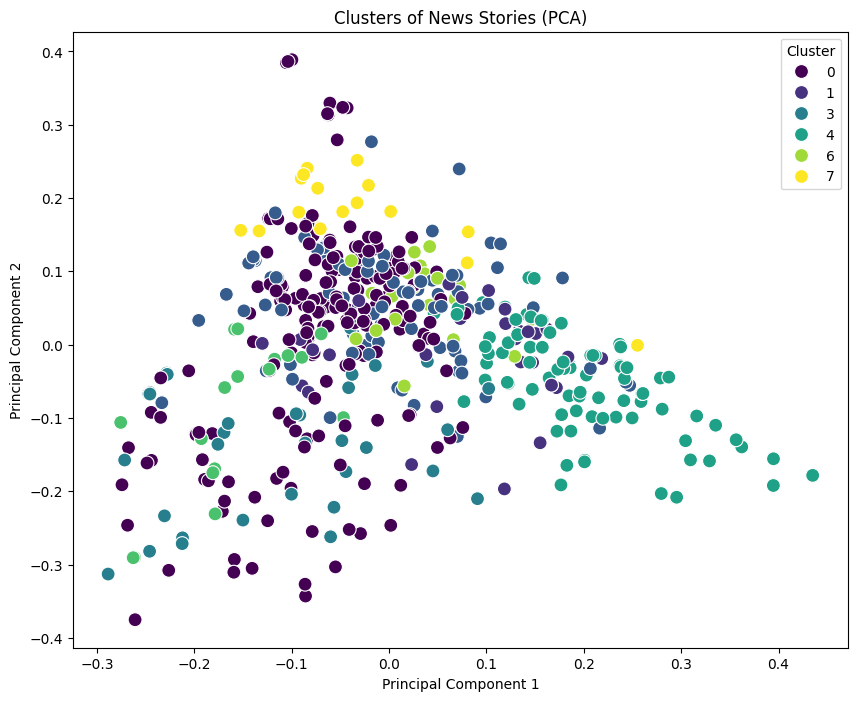

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results and the cluster labels
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of News Stories (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Visualization Using UMAP

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-14 21:57:02.500961: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


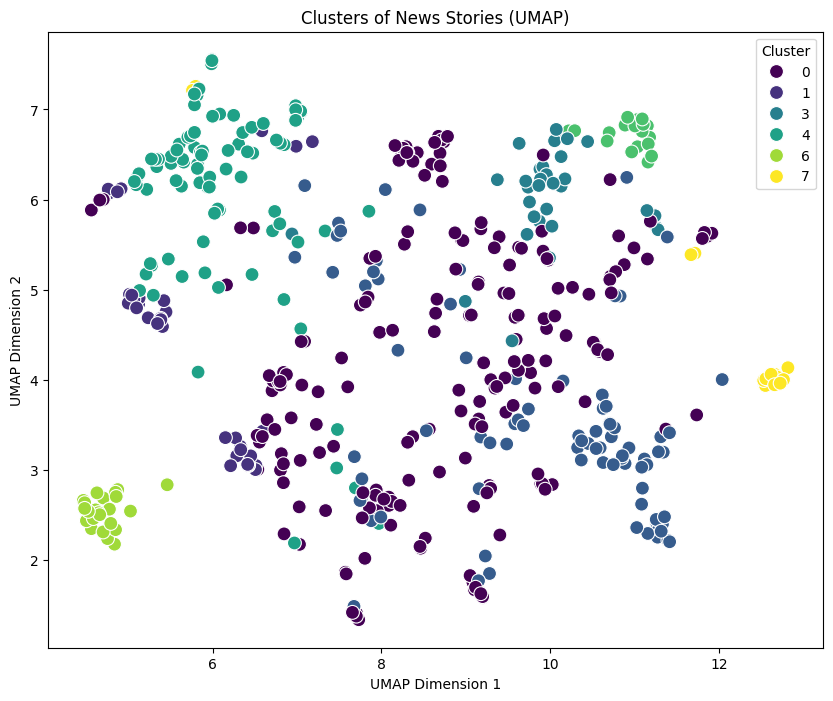

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns


# Apply UMAP to reduce dimensions to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Create a DataFrame with the UMAP results and the cluster labels
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of News Stories (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster')
plt.show()


Hierarchical Clustering and Dendrograms

TF-IDF matrix shape: (500, 4999)


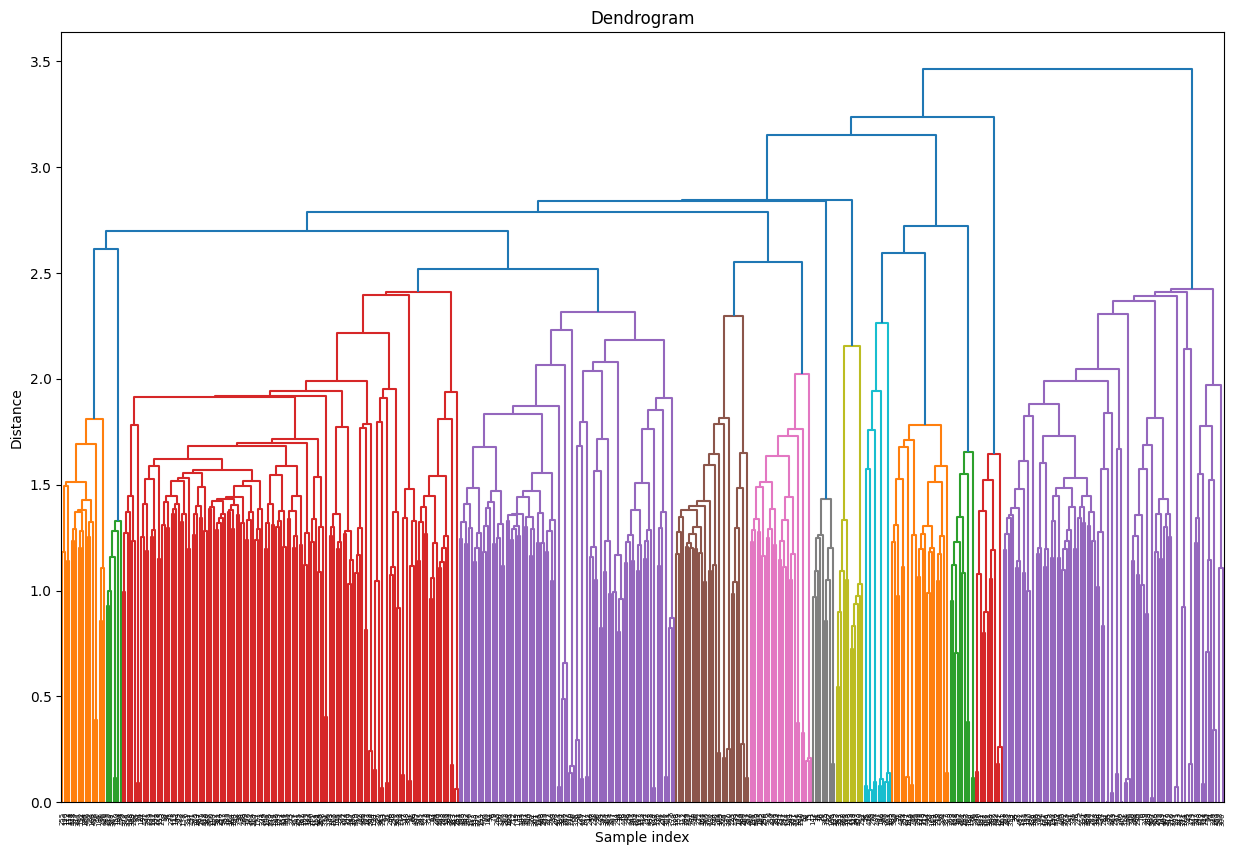

In [13]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the TF-IDF vectors from the CSV file
tfidf_vectors = pd.read_csv('vectorized_tfidf_500.csv', index_col=0)

# Convert the DataFrame to a numpy array
X = tfidf_vectors.values

print(f"TF-IDF matrix shape: {X.shape}")

# Apply hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


### Clustering - Word2Vec Model

K-Mean Clustering

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

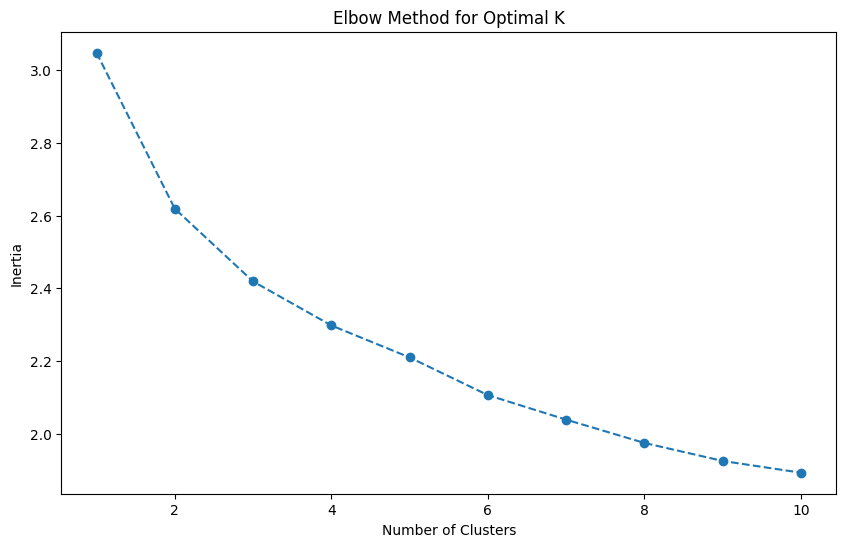

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load embedded data from CSV file
embedded_data = pd.read_csv("vectorized_word2vec_500.csv")

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedded_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow curve, select the optimal number of clusters and perform K-Means clustering
optimal_k = 4  # Adjust this based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(embedded_data)

# Add cluster labels to the embedded data
embedded_data_with_labels = embedded_data.copy()
embedded_data_with_labels['Cluster'] = cluster_labels

# Save the clustered data to a new CSV file
embedded_data_with_labels.to_csv("clustered_word2vec_500.csv", index=False)

Visualization

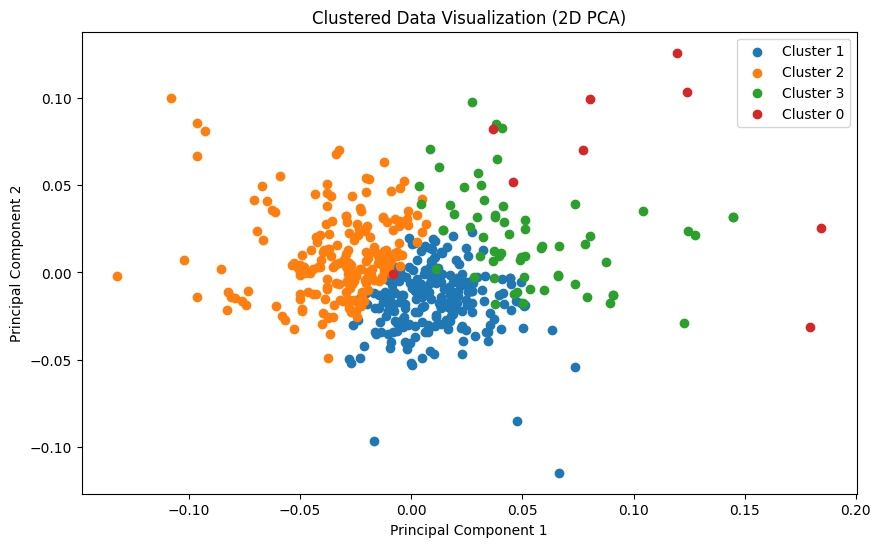

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load clustered data from CSV file
clustered_data = pd.read_csv("clustered_word2vec_500.csv")

# Extract embedded features
embedded_features = clustered_data.drop(columns=['Cluster'])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
embedded_2d = pca.fit_transform(embedded_features)

# Add cluster labels to the reduced data
embedded_2d_with_labels = pd.DataFrame(embedded_2d, columns=['PC1', 'PC2'])
embedded_2d_with_labels['Cluster'] = clustered_data['Cluster']

# Plot clustered data
plt.figure(figsize=(10, 6))
for cluster_label in clustered_data['Cluster'].unique():
    cluster_data = embedded_2d_with_labels[embedded_2d_with_labels['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')
plt.title('Clustered Data Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Hierarchical Clustering

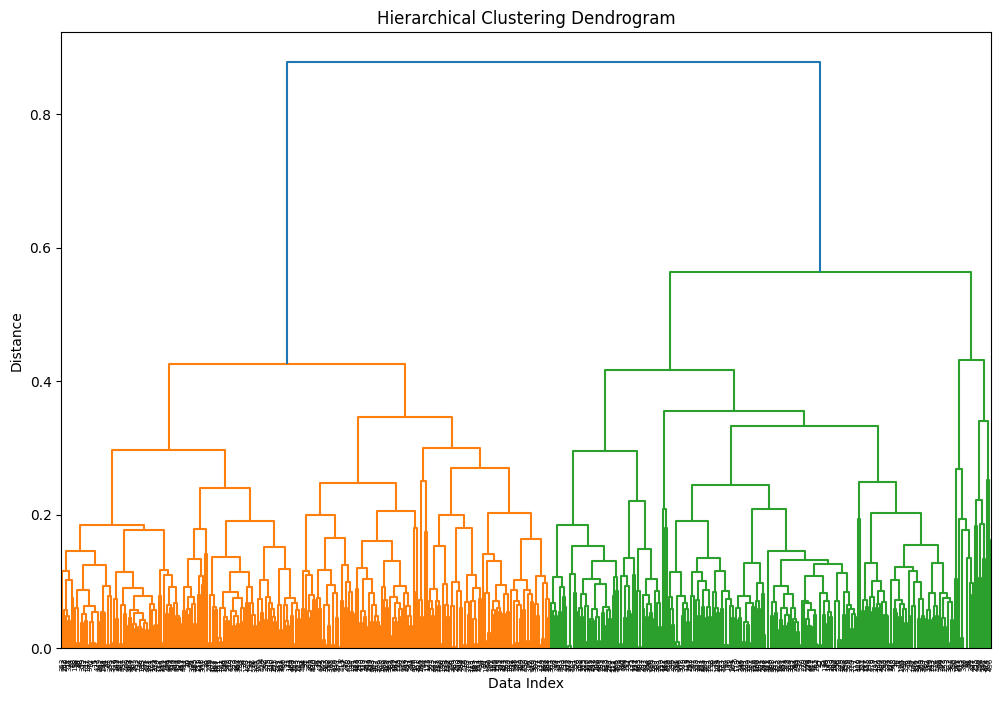

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load embedded data from CSV file
embedded_data = pd.read_csv("vectorized_word2vec_500.csv")

# Perform hierarchical clustering
# You may need to adjust the parameters (e.g., linkage method, distance metric) based on your data
linkage_matrix = linkage(embedded_data, method='ward', metric='euclidean')

# Plot dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, determine the optimal number of clusters
# You can use visual inspection or a cut-off threshold to select the number of clusters

# Perform Agglomerative Hierarchical Clustering with the optimal number of clusters
optimal_num_clusters = 4  # Adjust based on dendrogram visualization or other criteria
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_num_clusters, linkage='ward')
cluster_labels = hierarchical_clustering.fit_predict(embedded_data)

# Add cluster labels to the embedded data
embedded_data_with_labels = embedded_data.copy()
embedded_data_with_labels['Cluster'] = cluster_labels

# Save the clustered data to a new CSV file
embedded_data_with_labels.to_csv("hierarchical_clustered_word2vec_500.csv", index=False)

Re-Assign Clusters to News Stories

In [17]:
import pandas as pd

def read_clustered_data(clustered_file_path, tokenized_data_path):
    # Load clustered data
    clustered_data = pd.read_csv(clustered_file_path)

    # Read tokenized data
    with open(tokenized_data_path, 'r') as file:
        tokenized_data = [line.strip().strip('"') for line in file.readlines()]

    # Map clusters to original text data
    merged_data = pd.concat([clustered_data, pd.DataFrame(tokenized_data, columns=['text'])], axis=1)

    # Group data by cluster label
    grouped_data = merged_data.groupby('Cluster')

    # Iterate over groups and access member stories
    for cluster_label, cluster_group in grouped_data:
        # Save clustered stories to individual files
        cluster_file_name = f"cluster_{cluster_label}.txt"
        cluster_group['text'].to_csv(cluster_file_name, index=False)
        # Print number of stories saved
        num_stories = cluster_group.shape[0]
        print(f"{num_stories} stories saved to {cluster_file_name}")
        

# Example usage
clustered_file_path = 'clustered_word2vec_500.csv'  # Update with your file path
tokenized_data_path = 'tokenizedFine_500.json'  # Update with your tokenized data file path
read_clustered_data(clustered_file_path, tokenized_data_path)

9 stories saved to cluster_0.0.txt
229 stories saved to cluster_1.0.txt
198 stories saved to cluster_2.0.txt
64 stories saved to cluster_3.0.txt


### Clustering - BERT Model

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

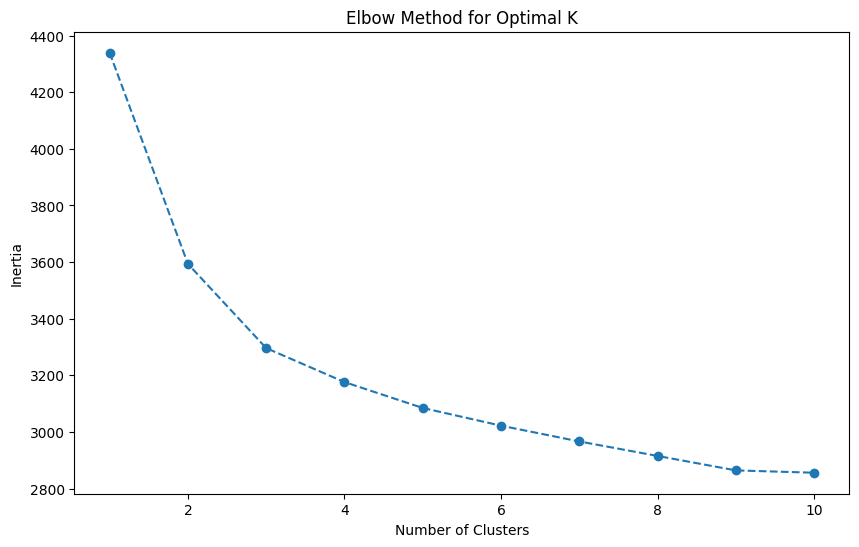

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load embedded data from CSV file
embedded_data = pd.read_csv("vectorized_BERT_500.csv")

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedded_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow curve, select the optimal number of clusters and perform K-Means clustering
optimal_k = 4  # Adjust this based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(embedded_data)

# Add cluster labels to the embedded data
embedded_data_with_labels = embedded_data.copy()
embedded_data_with_labels['Cluster'] = cluster_labels

# Save the clustered data to a new CSV file
embedded_data_with_labels.to_csv("clustered_BERT_500.csv", index=False)

Visualization of Clustered Data

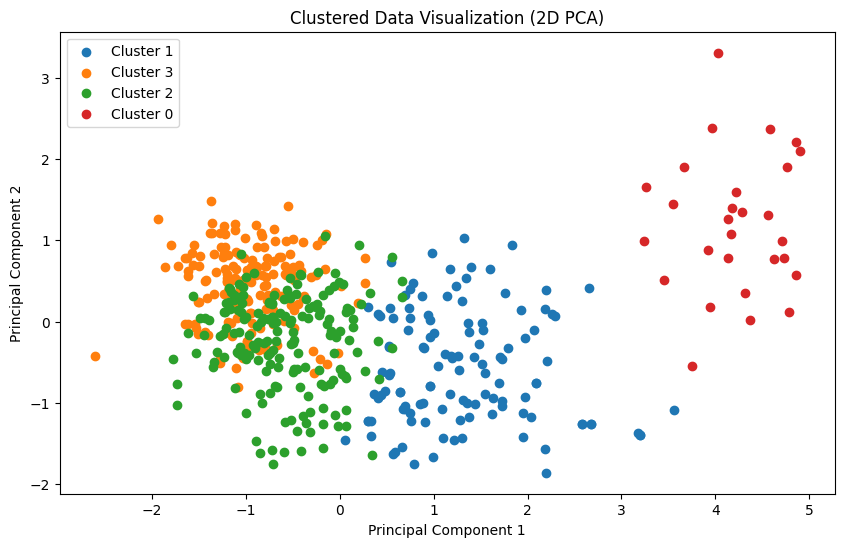

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load clustered data from CSV file
clustered_data = pd.read_csv("clustered_BERT_500.csv")

# Extract embedded features
embedded_features = clustered_data.drop(columns=['Cluster'])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
embedded_2d = pca.fit_transform(embedded_features)

# Add cluster labels to the reduced data
embedded_2d_with_labels = pd.DataFrame(embedded_2d, columns=['PC1', 'PC2'])
embedded_2d_with_labels['Cluster'] = clustered_data['Cluster']

# Plot clustered data
plt.figure(figsize=(10, 6))
for cluster_label in clustered_data['Cluster'].unique():
    cluster_data = embedded_2d_with_labels[embedded_2d_with_labels['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')
plt.title('Clustered Data Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Hierarchical Clustering

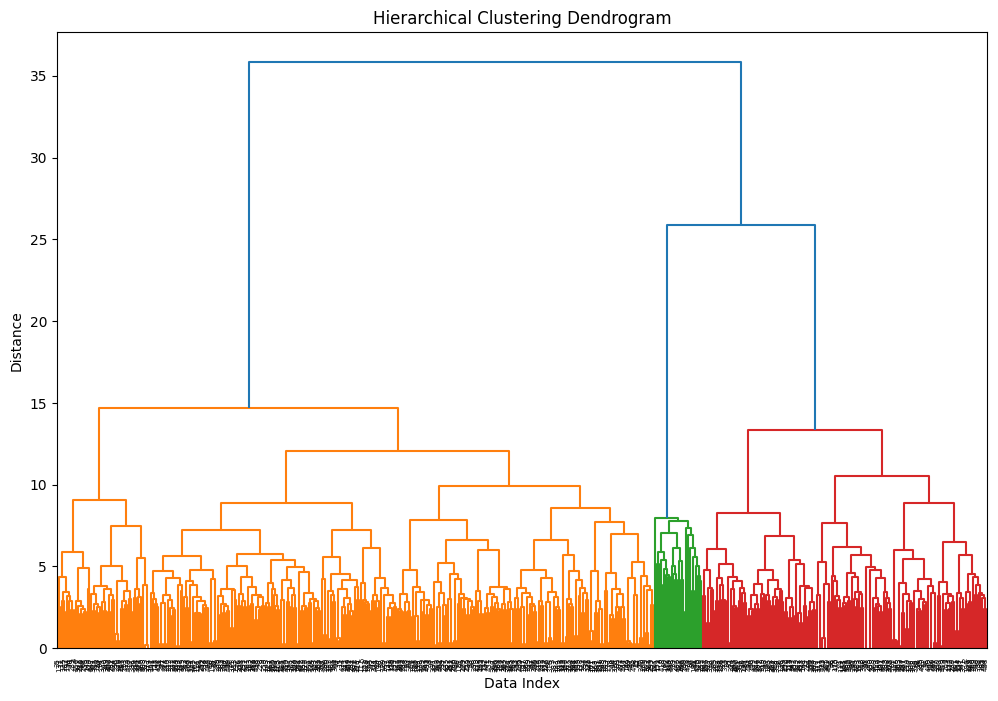

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load embedded data from CSV file
embedded_data = pd.read_csv("vectorized_BERT_500.csv")

# Perform hierarchical clustering
# You may need to adjust the parameters (e.g., linkage method, distance metric) based on your data
linkage_matrix = linkage(embedded_data, method='ward', metric='euclidean')

# Plot dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, determine the optimal number of clusters
# You can use visual inspection or a cut-off threshold to select the number of clusters

# Perform Agglomerative Hierarchical Clustering with the optimal number of clusters
optimal_num_clusters = 4  # Adjust based on dendrogram visualization or other criteria
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_num_clusters, linkage='ward')
cluster_labels = hierarchical_clustering.fit_predict(embedded_data)

# Add cluster labels to the embedded data
embedded_data_with_labels = embedded_data.copy()
embedded_data_with_labels['Cluster'] = cluster_labels

# Save the clustered data to a new CSV file
embedded_data_with_labels.to_csv("hierarchical_clustered_BERT_500.csv", index=False)

Re-Assign Clusters to News Stories

In [22]:
import json
import pandas as pd

def read_clustered_data(clustered_file_path, tokenized_data_path):
    # Load clustered data
    clustered_data = pd.read_csv(clustered_file_path)

    # Read tokenized data
    with open(tokenized_data_path, 'r') as file:
        tokenized_data = [line.strip().strip('"') for line in file.readlines()]

    # Map clusters to original text data
    merged_data = pd.concat([clustered_data, pd.DataFrame(tokenized_data, columns=['text'])], axis=1)

    # Group data by cluster label
    grouped_data = merged_data.groupby('Cluster')

    # Initialize a dictionary to store cluster sizes
    cluster_sizes = {}

    # Iterate over groups and access member stories
    for cluster_label, cluster_group in grouped_data:
        # Ensure cluster label is an integer
        cluster_label = int(cluster_label)

        # Extract texts from the cluster
        texts = cluster_group['text'].tolist()

        # Prepare output file path
        cluster_file_name = f"cluster_{cluster_label}.json"

        # Save texts as a JSON list
        with open(cluster_file_name, 'w') as json_file:
            json.dump(texts, json_file, indent=2)

        # Count number of stories saved
        num_stories = len(texts)
        cluster_sizes[cluster_label] = num_stories
        
        # Print number of stories saved
        print(f"{num_stories} stories saved to {cluster_file_name}")

    # Print total number of clusters processed
    print(f"Total clusters processed: {len(cluster_sizes)}")

    return cluster_sizes

# Example usage
clustered_file_path = 'clustered_BERT_500.csv'  # Update with your file path
tokenized_data_path = 'tokenizedFine_500.json'  # Update with your tokenized data file path
cluster_sizes = read_clustered_data(clustered_file_path, tokenized_data_path)


28 stories saved to cluster_0.json
119 stories saved to cluster_1.json
185 stories saved to cluster_2.json
168 stories saved to cluster_3.json
Total clusters processed: 4


In [4]:
import json
import pandas as pd

def read_clustered_data(clustered_file_path, tokenized_data_path):
    # Load clustered data
    clustered_data = pd.read_csv(clustered_file_path)

    # Read tokenized data
    with open(tokenized_data_path, 'r') as file:
        tokenized_data = [line.strip().strip('"') for line in file.readlines()]

    # Map clusters to original text data
    merged_data = pd.concat([clustered_data, pd.DataFrame(tokenized_data, columns=['text'])], axis=1)

    # Group data by cluster label
    grouped_data = merged_data.groupby('Cluster')

    # Initialize a dictionary to store cluster sizes
    cluster_sizes = {}

    # Iterate over groups and access member stories
    for cluster_label, cluster_group in grouped_data:
        # Ensure cluster label is an integer
        cluster_label = int(cluster_label)

        # Extract texts from the cluster
        texts = cluster_group['text'].tolist()

        # Prepare output file path
        cluster_file_name = f"cluster_{cluster_label}.json"

        # Save texts as a JSON list
        with open(cluster_file_name, 'w') as json_file:
            json.dump(texts, json_file, indent=2)

        # Count number of stories saved
        num_stories = len(texts)
        cluster_sizes[cluster_label] = num_stories
        
        # Print number of stories saved
        print(f"{num_stories} stories saved to {cluster_file_name}")

    # Print total number of clusters processed
    print(f"Total clusters processed: {len(cluster_sizes)}")

    return cluster_sizes

# Example usage
clustered_file_path = 'clustered_BERT_300.csv'  # Update with your file path
tokenized_data_path = 'tokenized_ID_300.json'  # Update with your tokenized data file path
cluster_sizes = read_clustered_data(clustered_file_path, tokenized_data_path)


98 stories saved to cluster_0.json
123 stories saved to cluster_1.json
58 stories saved to cluster_2.json
21 stories saved to cluster_3.json
Total clusters processed: 4
